In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets

In [4]:
X, y = datasets.make_moons()

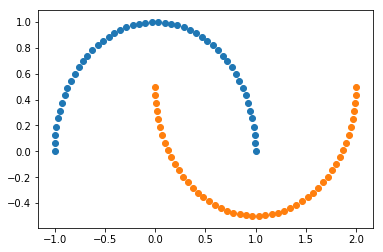

In [6]:
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

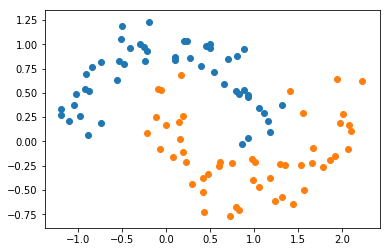

In [11]:
X, y = datasets.make_moons(noise=0.15, random_state=666)
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

# 使用多项式特征的SVM

In [12]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline

def PolynomialSVC(degree, C=1.0):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('standard', StandardScaler()),
        ('svm', LinearSVC(C=C))
    ])

In [13]:
poly_svc = PolynomialSVC(degree=3)
poly_svc.fit(X, y)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('standard', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm', LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))])

# 多项式核函数的SVM

In [15]:
from sklearn.svm import SVC
def PolynomialKernelSVC(degree, C=1.0):
    return Pipeline([
        ('standard', StandardScaler()),
        ('kernelSVC', SVC(kernel='poly', degree=degree, C=C))
    ])

In [16]:
poly_kernel_svc = PolynomialKernelSVC(degree=3)
poly_kernel_svc.fit(X, y)

Pipeline(memory=None,
     steps=[('standard', StandardScaler(copy=True, with_mean=True, with_std=True)), ('kernelSVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])